# Lagrange Interpolation
---

GENERAL PROBLEM: Suppose we are given values of some function $f(x_{0}),\ldots,f(x_{n})$, at the points $x_{0},\ldots,x_{n}$. Using these data alone, we want to find a polynomial, $p(x)$, that passes through those points and thereby approximates the function.

IDEA: Construct a generic polynomial with undetermined coefficients related to the function and its derivates at the various points (say, using Taylor series expansions about different points). Set up an algebraic system of equations for the undetermined coefficients in terms of the given data. Solve.

PRE-REQUISITES:
- [None]

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*
- [2] Burden and Faires, *Numerical Analysis, 7th edition*
- [3] Ralston and Rabinowitz, *A First Course in Numerical Analysis, 2nd edition*
- [4] Bulirsch and Stoer, *Introduction to Numerical Analysis, 2nd edition*

## Warm-Up: Linear Interpolation

Suppose we are given $f(x_{0})$ and $f(x_{1})$ at the points $x_{0}$ and $x_{1}$, respectively. We can easily find the unique line that passes through those points as follows. The slope of the line is

\begin{equation}
   \text{slope} = \frac{f_{1} - f_{0}}{x_{1} - x_{0}},
\end{equation}

where $f_{i}=f(x_{i})$. The equation for the line can therefore be written

\begin{equation}
   p(x) = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})}x + p(0).
\end{equation}

Evaluating this at $x_{0}$ gives

\begin{equation}
   p(x_{0}) = f_{0} = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})}x_{0} + p(0).
\end{equation}

We now elimate $p(0)$ in terms of the given data. Solving for $p(0)$ gives

\begin{equation}
   p(0) = \frac{(x_{1} f_{0} - f_{1} x_{0})}{(x_{1} - x_{0})}.
\end{equation}

Plugging this back into the expression for $p(x)$ above gives

\begin{equation}
   p(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})}f(x_{0}) 
   + \frac{(x - x_{0})}{(x_{1} - x_{0})}f(x_{1}).
\end{equation}

By inspection we see that $p(x_{0})=f(x_{0})$ and $p(x_{1})=f(x_{1})$, as required. The function $p(x)$ is therefore the unique line that passes through $f(x_{0})$ and $f(x_{1})$. This solution is the (first or n=1) Lagrange interpolating polynomial. In this case, the polynomial is just a line. We will generalize this procedure to higher-order polynomials below.

### Interpolating Function via Taylor Series

As an alternative to the above derivation, we may derive the same result from Taylor series considerations. The Taylor series expansions of $f(x)$ in the neighborhoods of $x_{0}$ and $x_{1}$ yields

\begin{align*}
   f(x_{0}) &= f(x) + (x_{0} - x)f'(x) + \cdots \\
   f(x_{1}) &= f(x) + (x_{1} - x)f'(x) + \cdots.
\end{align*}

Next, approximate $f(x)$ by the truncated polynomial $p(x)$, leading to

\begin{align*}
   f(x_{0}) &= f_{0} = p(x) + (x_{0} - x)p'(x)\\
   f(x_{1}) &= f_{1} = p(x) + (x_{1} - x)p'(x).
\end{align*}

This gives two equations in the two unknowns, $p(x)$ and $p'(x)$. Solving for $p'(x)$ gives

\begin{equation}
   p'(x) = \frac{(f_{1} - f_{0})}{(x_{1} - x_{0})},
\end{equation}

and then plugging back in to get $p(x)$ gives

\begin{equation}
   p(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})}f(x_{0}) + \frac{(x - x_{0})}{(x_{1} - x_{0})}f(x_{1}).
\end{equation}

This gives the same interpolating function as above.

### Basis Polynomials

We can write the interpolating polynomial in terms of basis polynomials as follows

\begin{equation}
   p(x) = L_{0}(x)f(x_{0}) + L_{1}(x)f(x_{1}),
\end{equation}

where

\begin{equation}
   L_{0}(x) = \frac{(x - x_{1})}{(x_{0} - x_{1})} 
   \quad\text{and}\quad 
   L_{1}(x) = \frac{(x - x_{0})}{(x_{1} - x_{0})}.
\end{equation}

Note that $L_{0}(x)$ and $L_{1}(x)$ act as weight functions. To see this, consider their asyptotic behavior.

\begin{align*}
   &\text{as } x\rightarrow x_{0}: \quad L_{0}\rightarrow 1 \quad\text{and}\quad L_{1}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{1}: \quad L_{0}\rightarrow 0 \quad\text{and}\quad L_{1}\rightarrow 1 \\
\end{align*}

As a result, $p(x_{0})\rightarrow f_{0}$ and $p(x_{1})\rightarrow f_{1}$.

### Linear Interpolation Code
Below is a program that implements the linear interpolation scheme above, given two data points.

In [1]:
# set graphics backend
%matplotlib inline

In [2]:
# iport libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def interpLinear(x, xdata, fdata) :
    """ 
    Function that finds the unique straight line through two points
    
    INPUT
    x     : grid point where function value is wanted
    xdata : [x0,x1], 1D array of grid points where function values are given
    fdata : [f0,f1], 1D array of function values at given grid points

    OUTPUT
    p     : value of interpolating function at grid point
    
    """

    x0 = xdata[0]
    x1 = xdata[1]
    f0 = fdata[0]
    f1 = fdata[1]
    L0 = (x - x1)/(x0 - x1)
    L1 = (x - x0)/(x1 - x0)
    p = L0*f0 + L1*f1
    return p

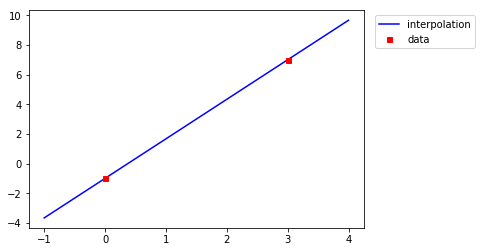

In [8]:
# input data
data = np.array([[0,-1],[3,7]])
xdata = data[:,0]
ydata = data[:,1]

# setup x grid
xmin = np.amin(xdata)
xmax = np.amax(xdata)
x = np.linspace(xmin-1,xmax+1,100)

# call interpolation routine
y = interpLinear(x, xdata, ydata)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Quadratic Interpolation

Next suppose we are given $f(x_{0})$, $f(x_{1})$, and $f(x_{2})$ at the points $x_{0}$, $x_{1}$, and $x_{2}$, respectively. The quadratic equation that passes through these three points can be parameterized as

\begin{equation}
   p(x) = a_{0} + a_{1} x + a_{2} x^2,
\end{equation}

where $a_{0}$, $a_{1}$, and $a_{2}$ are undetermined coefficients. Evaluating $p(x)$ at $x_{0}$, $x_{1}$, and $x_{2}$ yields three equations in these undetermined coeffients

\begin{align*}
   p(x_{0}) &= a_{0} + a_{1} x_{0} + a_{2} x_{0}^2 \\
   p(x_{1}) &= a_{0} + a_{1} x_{1} + a_{2} x_{1}^2 \\
   p(x_{2}) &= a_{0} + a_{1} x_{2} + a_{2} x_{2}^2.
\end{align*}

Solving this system of equations and plugging the results back into the expression for $p(x)$ above gives

\begin{equation}
   p(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}f(x_{0}) 
   + \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}f(x_{1})
   + \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}f(x_{2}).
\end{equation}

By inspection we see that $p(x_{0})=f(x_{0})$, $p(x_{1})=f(x_{1})$, and $p(x_{2})=f(x_{2})$, as required. 

### Basis Polynomials
As before, $p(x)$ can be expressed in terms of basis polynomials as

\begin{equation}
   p(x) = L_{0}(x) f(x_{0}) + L_{1}(x) f(x_{1}) + L_{2}(x) f(x_{2}),
\end{equation}

where 

\begin{equation}
   L_{0}(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}
   \quad,\quad
   L_{1}(x) = \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}
   \quad,\quad
   L_{2}(x) = \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}.
\end{equation}

These basis polynomials have the asymptotic properties

\begin{align*}
   &\text{as } x\rightarrow x_{0}: 
      \quad L_{0}\rightarrow 1 \quad,
      \quad L_{1}\rightarrow 0 \quad,
      \quad L_{2}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{1}: 
      \quad L_{0}\rightarrow 0 \quad,
      \quad L_{1}\rightarrow 1 \quad,
      \quad L_{2}\rightarrow 0 \\
   &\text{as } x\rightarrow x_{2}: 
      \quad L_{0}\rightarrow 0 \quad,
      \quad L_{1}\rightarrow 0 \quad,
      \quad L_{2}\rightarrow 1 
\end{align*}

As a result, $p(x_{0})\rightarrow f_{0}$, $p(x_{1})\rightarrow f_{1}$, and $p(x_{2})\rightarrow f_{2}$.

### Quadratic Interpolation Code
Below is an extension of the above code to the case of quadratic interpolation, given three data points. 

In [9]:
def interpQuad(x, xdata, fdata) :
    """ 
    Function that finds the unique quadratic that passes through three points.
    
    INPUT
    x     : grid point where function value is wanted
    xdata : [x0,x1,x2], 1D array of grid points where function values are given
    fdata : [f0,f1,f2], 1D array of function values at given grid points

    OUTPUT
    p     : value of interpolating function at grid point
    
    """

    x0 = xdata[0]
    x1 = xdata[1]
    x2 = xdata[2]
    f0 = fdata[0]
    f1 = fdata[1]
    f2 = fdata[2]
    L0 = (x - x1)*(x - x2)/((x0 - x1)*(x0 - x2))
    L1 = (x - x2)*(x - x0)/((x1 - x2)*(x1 - x0))
    L2 = (x - x0)*(x - x1)/((x2 - x0)*(x2 - x1))
    p = L0*f0 + L1*f1 + L2*f2
    return p

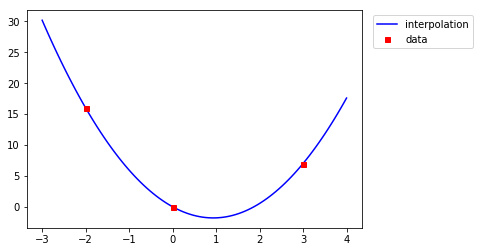

In [10]:
# input data
data = np.array([[0,0],[3,7],[-2,16]])
xdata = data[:,0]
ydata = data[:,1]

# setup x grid
xmin = np.amin(xdata)
xmax = np.amax(xdata)
x = np.linspace(xmin-1,xmax+1,100)

# call interpolation routine
y = interpQuad(x, xdata, ydata)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1),loc=2)
plt.show()

## Interpolating Polynomial of Degree n

If $n+1$ data are given ($f(x_{0}),\ldots,f(x_{n})$) then the interpolating polynomial of degree $n$ is given by

\begin{equation}
   p_{n}(x) = L_{n,0}(x)f(x_{0}) + \cdots + L_{n,n}(x)f(x_{n})
   = \sum_{i=0}^{n} L_{n,i}(x) f(x_{i}),
\end{equation}

where 

\begin{equation}
   L_{n,i}(x) = \prod_{j=0, j\neq i}^{n}\frac{(x - x_{j})}{(x_{i} - x_{j})}.
\end{equation}

For example, for $n=3$ (cubic interpolation) and $i=2$:

\begin{equation}
   L_{3,2}(x) = \prod_{j=0, j\neq 2}^{3}\frac{(x - x_{j})}{(x_{2} - x_{j})}
   = \frac{(x - x_{0})(x - x_{1})(x - x_{3})}{(x_{2} - x_{0})(x_{2} - x_{1})(x_{2} - x_{3})}.
\end{equation}

When there is no chance of confusion, the Lagrange basis polynomials of degree $n$ are often denoted simply as $L_{i}(x)$ instead of $L_{n,i}(x)$, and the Lagrange interpolating polynomial is denoted simply as $p(x)$ instead of $p_{n}(x)$.

Note that this representation of a function is *exact* if the function is a polynomial of degree $n$ *or less*. In general, if $p_{n}(x)$ is the interpolating polynomial of degree $n$ above, then a function $f(x)$ can be represented as

\begin{equation}
   f(x) = p_{n}(x) + \mathcal{O}\left(f^{(n+1)}(x)\right).
\end{equation}

In other words, the error in the approximation goes as the $(n+1)$-th derivative of $f(x)$. If $f(x)$ is a polynomial of degree $\leq n$, then this derivative (and all higher-order derivatives) vanish identically. And so in that case $f(x) = p_{n}(x)$, exactly.

### General Polynomial Interpolation Code
Below is an extension of the interpolation program above to the general case.

In [11]:
%%writefile intrpf.py
def intrpf(x, xdata, fdata) :
    """ 
    Function that interpolates the unique n-degree polynomial that passes 
    through n+1 data points.
    
    INPUT
    x     : grid point where function value is wanted
    xdata : [x0,...,xN], 1D array of grid points where function is known
    fdata : [f0,...,fN], 1D array of function values at given grid points

    OUTPUT
    p     : value of interpolating function at grid point
    
    """
    
    # initialize interpolating function
    p = 0
        
    # loop to calculate basis functions
    for i in range(len(xdata)):
        numerator = 1   # initialize numerator
        denominator = 1 # initialize denominator
        for j in range(len(xdata)):
            if j!=i:
                numerator = numerator*(x - xdata[j])
                denominator = denominator*(xdata[i] - xdata[j])

        Li = numerator/denominator
        p = p + Li*fdata[i]
            
    return p

Overwriting intrpf.py


In [15]:
%run intrpf.py

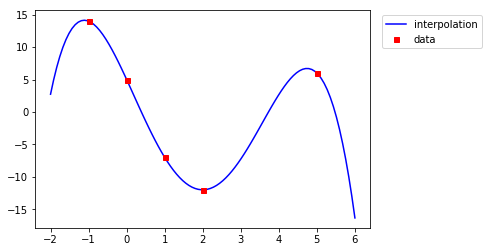

In [16]:
# input data 
data = np.array([[-1,14],[0,5],[1,-7],[2,-12],[5,6]]) # <-- ENTER DATA HERE
xdata = data[:,0]
ydata = data[:,1]

# setup x grid
xmin = np.amin(xdata)
xmax = np.amax(xdata)
x = np.linspace(xmin-1, xmax+1, 100)

# call interpolating routine
y = intrpf(x, xdata, ydata)

# plot
fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="interpolation")
ax.plot(xdata, ydata, 'rs', markersize=5, label="data")
ax.legend(bbox_to_anchor=(1.02,1), loc=2)
plt.show()

### Example: Bessel function
To see this in action, let's apply it to Bessel functions, whose values are well-tabulated. Below is a table for the Bessel functions $J_{1}(x)$ from $x=0$ to $x=10.0$. 

\begin{align*}
   J_1(0.0) &= 0.00000\,00000 \\
   J_1(1.0) &= 0.44005\,05857 \\
   J_1(2.0) &= 0.57672\,48078 \\
   J_1(3.0) &= 0.33905\,89585 \\
   J_1(4.0) &= -0.06604\,33280 \\
   J_1(5.0) &= -0.32757\,91376 \\
   J_1(6.0) &= -0.27668\,38581 \\
   J_1(7.0) &= -0.00468\,28235 \\
   J_1(8.0) &= 0.23463\,63469 \\
   J_1(9.0) &= 0.24531\,17866 \\
   J_1(10.0) &= 0.04347\,27462
\end{align*}

Let's use these tabulated data to obtain an approximate value for $J_1(5.5)$. 

In [19]:
# point we wish to approximate J_1(x)
x = 5.5

# tabluated values for J_1(x)
J1 = np.zeros((11,2))
J1[0,:] = [0.0, 0.0000000000]
J1[1,:] = [1.0, 0.4400505857]
J1[2,:] = [2.0, 0.5767248078]
J1[3,:] = [3.0, 0.3390589585]
J1[4,:] = [4.0, -0.0660433280]
J1[5,:] = [5.0, -0.3275791376]
J1[6,:] = [6.0, -0.2766838581]
J1[7,:] = [7.0, -0.0046828235]
J1[8,:] = [8.0, 0.2346363469]
J1[9,:] = [9.0, 0.2453117866]
J1[10,:] = [10.0, 0.0434727462]

# linear interpolation
data_lin = np.array(J1[4:6,:])
xdata = data_lin[:,0]
ydata = data_lin[:,1]
lin = intrpf(x, xdata, ydata)

# quadratic interpolation (left-weighted)
data_quadL = np.array(J1[3:6,:])
xdata = data_quadL[:,0]
ydata = data_quadL[:,1]
quadL = intrpf(x, xdata, ydata)

# quadratic interpolation (right-weighted)
data_quadR = np.array(J1[4:7,:])
xdata = data_quadR[:,0]
ydata = data_quadR[:,1]
quadR = intrpf(x, xdata, ydata)

# cubic interpolation
data_cubic = np.array(J1[3:7,:])
xdata = data_cubic[:,0]
ydata = data_cubic[:,1]
cubic = intrpf(x, xdata, ydata)

# quintic interpolation
data_quint = np.array(J1[2:8,:])
xdata = data_quint[:,0]
ydata = data_quint[:,1]
quint = intrpf(x, xdata, ydata)

# heptic interpolation
data_hept = np.array(J1[1:10,:])
xdata = data_hept[:,0]
ydata = data_hept[:,1]
hept = intrpf(x, xdata, ydata)

# ninth-order interpolation
data_ninth = np.array(J1[:,:])
xdata = data_ninth[:,0]
ydata = data_ninth[:,1]
ninth = intrpf(x, xdata, ydata)

# actual value
import scipy.special as sp
exact = sp.j1(x)

# print results
print ("linear interpolation                      =  ", lin)
print ("quadratic interpolation (left-weighted)   =  ", quadL)
print ("quadratic interpolation (right-weighted)  =  ", quadR)
print ("cubic interpolation                       =  ", cubic)
print ("quintic interpolation                     =  ", quint)
print ("heptic interpolation                      =  ", hept)
print ("ninth-order interpolation                 =  ", ninth) 
print ("exact                                     =  ", exact)

linear interpolation                      =   -0.4583470424
quadratic interpolation (left-weighted)   =   -0.40450961356250004
quadratic interpolation (right-weighted)  =   -0.34118538398750003
cubic interpolation                       =   -0.35173942225000004
quintic interpolation                     =   -0.3429591701832031
heptic interpolation                      =   -0.34144965943322453
ninth-order interpolation                 =   -0.3414408427282559
exact                                     =   -0.34143821542904335


### Exact / Tabulated Values of Some Bessel Functions

In [20]:
# zeroth-order Bessel function from Abramowitz and Stegun (Table 9.1, p.390)
abram_j0 = np.zeros((11, 2))
abram_j0[0]  = [0.0, 1.000000000000000]
abram_j0[1]  = [0.1, 0.997501562066040]
abram_j0[2]  = [0.2, 0.990024972239576]
abram_j0[3]  = [0.3, 0.977626246538296]
abram_j0[4]  = [0.4, 0.960398226659563]
abram_j0[5]  = [0.5, 0.938469807240813]
abram_j0[6]  = [0.6, 0.912004863497211]
abram_j0[7]  = [0.7, 0.881200888607405]
abram_j0[8]  = [0.8, 0.846287352750480]
abram_j0[9]  = [0.9, 0.807523798122545]
abram_j0[10] = [1.0, 0.765197686557967]

In [21]:
# zeroth-order Bessel function
# comparison of scipy.special.j0 with Abramowitz and Stegun
print('zeroth-order Bessel function of the first kind, J_0(x):')
print('scipy \t\t\t Abramowitz \t\t diff')
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.0), abram_j0[0,1],  abs(sp.j0(0.0) - abram_j0[0,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.1), abram_j0[1,1],  abs(sp.j0(0.1) - abram_j0[1,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.2), abram_j0[2,1],  abs(sp.j0(0.2) - abram_j0[2,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.3), abram_j0[3,1],  abs(sp.j0(0.3) - abram_j0[3,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.4), abram_j0[4,1],  abs(sp.j0(0.4) - abram_j0[4,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.5), abram_j0[5,1],  abs(sp.j0(0.5) - abram_j0[5,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.6), abram_j0[6,1],  abs(sp.j0(0.6) - abram_j0[6,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.7), abram_j0[7,1],  abs(sp.j0(0.7) - abram_j0[7,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.8), abram_j0[8,1],  abs(sp.j0(0.8) - abram_j0[8,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(0.9), abram_j0[9,1],  abs(sp.j0(0.9) - abram_j0[9,1])))
print('%.16f \t %.15f \t %.16f' % (sp.j0(1.0), abram_j0[10,1], abs(sp.j0(1.0) - abram_j0[10,1])))

zeroth-order Bessel function of the first kind, J_0(x):
scipy 			 Abramowitz 		 diff
1.0000000000000000 	 1.000000000000000 	 0.0000000000000000
0.9975015620660400 	 0.997501562066040 	 0.0000000000000000
0.9900249722395763 	 0.990024972239576 	 0.0000000000000003
0.9776262465382961 	 0.977626246538296 	 0.0000000000000001
0.9603982266595634 	 0.960398226659563 	 0.0000000000000004
0.9384698072408130 	 0.938469807240813 	 0.0000000000000000
0.9120048634972107 	 0.912004863497211 	 0.0000000000000003
0.8812008886074052 	 0.881200888607405 	 0.0000000000000002
0.8462873527504801 	 0.846287352750480 	 0.0000000000000001
0.8075237981225448 	 0.807523798122545 	 0.0000000000000002
0.7651976865579665 	 0.765197686557967 	 0.0000000000000006


In [22]:
# first-order Bessel function from Abramowitz and Stegun (Table 9.1, p.390)
abram_j1 = np.zeros((11, 2))
abram_j1[0]  = [0.0, 0.0]
abram_j1[1]  = [0.1, 0.0499375260]
abram_j1[2]  = [0.2, 0.0995008326]
abram_j1[3]  = [0.3, 0.1483188163]
abram_j1[4]  = [0.4, 0.1960265780]
abram_j1[5]  = [0.5, 0.2422684577]
abram_j1[6]  = [0.6, 0.2867009881]
abram_j1[7]  = [0.7, 0.3289957415]
abram_j1[8]  = [0.8, 0.3688420461]
abram_j1[9]  = [0.9, 0.4059495461]
abram_j1[10] = [1.0, 0.4400505857]

In [23]:
# first-order Bessel function
# comparison of scipy.special.j0 with Abramowitz and Stegun
print('first-order Bessel function of the first kind, J_1(x):')
print('scipy \t\t\t Abramowitz \t\t diff')
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.0), abram_j1[0,1],  abs(sp.j1(0.0) - abram_j1[0,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.1), abram_j1[1,1],  abs(sp.j1(0.1) - abram_j1[1,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.2), abram_j1[2,1],  abs(sp.j1(0.2) - abram_j1[2,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.3), abram_j1[3,1],  abs(sp.j1(0.3) - abram_j1[3,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.4), abram_j1[4,1],  abs(sp.j1(0.4) - abram_j1[4,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.5), abram_j1[5,1],  abs(sp.j1(0.5) - abram_j1[5,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.6), abram_j1[6,1],  abs(sp.j1(0.6) - abram_j1[6,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.7), abram_j1[7,1],  abs(sp.j1(0.7) - abram_j1[7,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.8), abram_j1[8,1],  abs(sp.j1(0.8) - abram_j1[8,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(0.9), abram_j1[9,1],  abs(sp.j1(0.9) - abram_j1[9,1])))
print('%.16f \t %.10f \t %.16f' % (sp.j1(1.0), abram_j1[10,1], abs(sp.j1(1.0) - abram_j1[10,1])))

first-order Bessel function of the first kind, J_1(x):
scipy 			 Abramowitz 		 diff
0.0000000000000000 	 0.0000000000 	 0.0000000000000000
0.0499375260362420 	 0.0499375260 	 0.0000000000362420
0.0995008326392360 	 0.0995008326 	 0.0000000000392360
0.1483188162731040 	 0.1483188163 	 0.0000000000268960
0.1960265779553188 	 0.1960265780 	 0.0000000000446812
0.2422684576748739 	 0.2422684577 	 0.0000000000251261
0.2867009880639157 	 0.2867009881 	 0.0000000000360843
0.3289957415400589 	 0.3289957415 	 0.0000000000400589
0.3688420460941700 	 0.3688420461 	 0.0000000000058300
0.4059495460788056 	 0.4059495461 	 0.0000000000211944
0.4400505857449336 	 0.4400505857 	 0.0000000000449336
